# **About the Data Set:**

The dataset contains a list of patients suffering from one or more of hypertension, diabetes, alcoholism and handicap, all of them binary variables, along with patient information (gender, age, neighbourhood) and information about appointment and scheduling times. There is also a no_show column which tells us if the patient visited the doctor.

Dimensions - 110527 rows, 14 columns


# **Variable Indentification**

**PatientId(Int)** - Identification of a patient<br>
**AppointmentID** - Identification of each appointment<br>
**Gender(Nominal)** - Male/Female<br>
**ScheduledDay(DateTime)** - The day someone called or registered the appointment<br>
**AppointmentDay(DateTime)** - The day of the actual appointment<br>
**Age(Continous)**-How old is the patient<br>
**Neighbourhood(Nominal)** - Locality of the patient/clinic<br>
**Scholarship(Boolean)** - 1(Received)/0(Not Received)<br>
**Hipertension(Boolean)** - 1(Suffering)/0(Not Suffering)<br>
**Diabetes(Boolean)** - 1(Suffering)/0(Not Suffering)<br>
**Alcoholism(Boolean)** - 1(Suffering)/0(Not Suffering)<br>
**Handcap(Boolean)** - 1(Handicap)/0(Not a Handicap)<br>
**SMS_received(Boolean)** - 1 or more messages sent to the patient - 1(Recieved)/0(Not Recieved)<br>
**No-show** - True/False<br>

# **Business Case**

Analyze data and know the impact of showing for appointments and receiving reminder SMS message. How many patients received an SMS and didn't show? What about the number of those who didn't show but also didn't receive a SMS. What are the other factors that affects the patient's no show?


# **Data Cleaning and Transformation**

In [1]:
#importing the required libraries
import pandas as pd
import numpy as np

#viz Libraries
import matplotlib.pyplot as plt

plt.style.use('ggplot')
import seaborn as sns

#warnings
import warnings
warnings.filterwarnings("ignore")

#datetime
import datetime as dt


In [2]:
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/noshowappointments/KaggleV2-May-2016.csv


In [3]:
#reading the data
df = pd.read_csv('../input/noshowappointments/KaggleV2-May-2016.csv')

In [4]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
df.shape

(110527, 14)

In [6]:
df.drop_duplicates()
df.shape

(110527, 14)

In [7]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

# **Renaming the misspelt columns**

In [8]:
 df = df.rename(columns={"Hipertension": "Hypertension", "Handcap":"Handicap"})

# **Verifying the data types**

In [9]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hypertension        int64
Diabetes            int64
Alcoholism          int64
Handicap            int64
SMS_received        int64
No-show            object
dtype: object

# **Correcting the inconsistent datatypes**

In [10]:
#Converting to boolean
for each in ["Scholarship", "Hypertension", "Diabetes", "Alcoholism", "Handicap"]:
    df[each] = df[each].astype(np.bool)

In [11]:
# Converting to Datetime
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

#Removing the TimeZones
df['ScheduledDay'] = df['ScheduledDay'].dt.tz_localize(None)
df['AppointmentDay'] = df['AppointmentDay'].dt.tz_localize(None)

# **Checking for null values**

In [12]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hypertension      0
Diabetes          0
Alcoholism        0
Handicap          0
SMS_received      0
No-show           0
dtype: int64

There are no null values in the data.

# **Uni-variate Analysis**

**Unique PatientIds and AppointmentIds**

In [13]:
unique_patienids = df['PatientId'].nunique()
unique_appointmentids = df['AppointmentID'].nunique()
recurring_patients = (unique_appointmentids - unique_patienids)/unique_appointmentids

print('Unique PatientIds :' + str(unique_patienids))
print('Unique AppointmentIds :' + str(unique_appointmentids))
print('% of recurring patients:'+ str(recurring_patients))

Unique PatientIds :62299
Unique AppointmentIds :110527
% of recurring patients:0.4363458702398509


There are only 62299 unique patient ids while the number of unique appointment ids are 110527. This shows that 43% of the appointments are made by the recurring patients.

**Gender**

F    0.649977
M    0.350023
Name: Gender, dtype: float64
Total Patients:110527


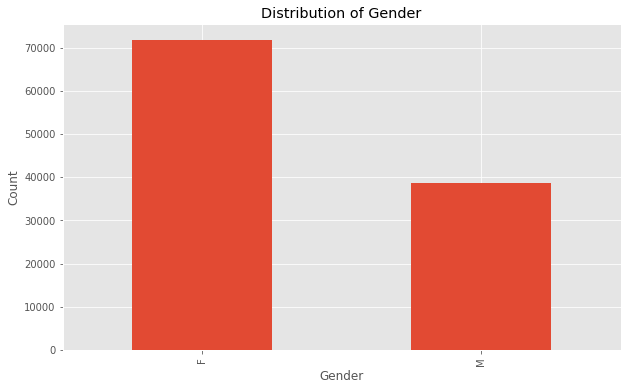

In [14]:
print(df['Gender'].value_counts(normalize = True))
print('Total Patients:' + str(df['Gender'].value_counts().sum()))

plt.figure(figsize=(10,6))
df['Gender'].value_counts().plot(kind= 'bar')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

There are 110527 appointments in total. 65% of the appointments are reserved by Female and 35% are reserved by Male. This indicates that the probability of ill health is distributed disproportionately among the Male and Female. 

**Handicap**

In [15]:
df['Handicap'].value_counts()

False    108286
True       2241
Name: Handicap, dtype: int64

**Age**

In [16]:
print('Descriptive Statistics for "Age"')
print(df['Age'].describe())

Descriptive Statistics for "Age"
count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64


* The descriptive stats show that the minimum age of the patients is -1, which can be a data entry error. Removing the rows with negative age in the next step.
* Age can have a value of zero because of posible presence of toddlers in the data.

In [17]:
df = df[df['Age'] >= 0]

In [18]:
print(len(df[df['Age'] == 0]))
df[df['Age'] == 0].head()

3539


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
59,7.184428e+13,5638545,F,2016-04-29 08:08:43,2016-04-29,0,CONQUISTA,False,False,False,False,False,0,No
63,2.366233e+14,5628286,M,2016-04-27 10:46:12,2016-04-29,0,SÃO BENEDITO,False,False,False,False,False,0,No
64,1.885174e+14,5616082,M,2016-04-25 13:28:21,2016-04-29,0,ILHA DAS CAIEIRAS,False,False,False,False,False,1,No
65,2.718818e+14,5628321,M,2016-04-27 10:48:50,2016-04-29,0,CONQUISTA,False,False,False,False,False,0,No
67,8.647128e+13,5639264,F,2016-04-29 08:53:02,2016-04-29,0,NOVA PALESTINA,False,False,False,False,False,0,No


* The assumption that patients with 0 age as toodlers can be considered appropriate, as we can above that they received no scholarships and are not suffering from any diseases. 
* There are 3539 toddler appointments in the data.

**Distribution of Age**

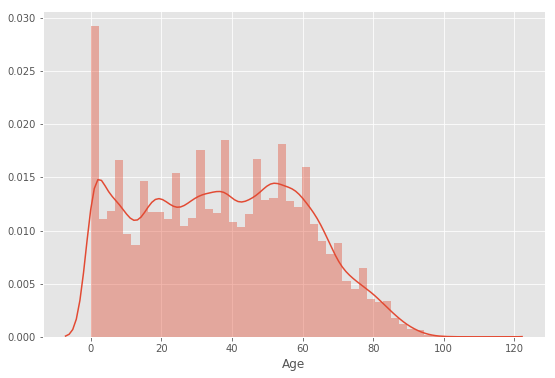

In [19]:
plt.figure(figsize=(9,6))
sns.distplot(df['Age'])
plt.show()

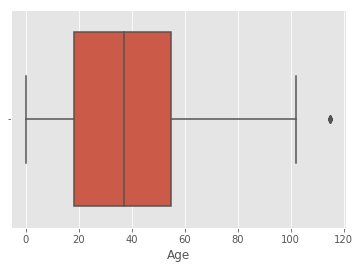

In [20]:
sns.boxplot(df['Age'])
plt.show()

* The average age of the patients is approximately 37 years.
* 50% of the patients are between the age of 18-55 years.
* The highest age recorded is 115 years.

**Creating a new column "Age Category" for better understanding the age distribution.**

Adults      0.532517
Children    0.210421
Senior      0.130304
Youth       0.126758
Name: Age Category, dtype: float64


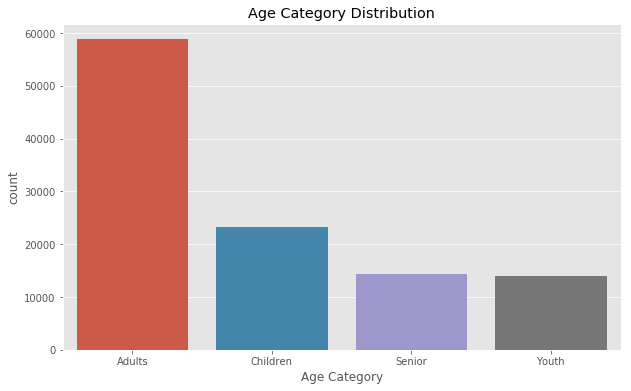

In [21]:
def age_category(col):
    if (col >= 0) & (col <=14):
        return 'Children'
    elif (col >= 15) & (col <=24):
        return 'Youth'
    elif (col >= 25) & (col <=64):
        return 'Adults'
    else:
        return 'Senior'

df['Age Category'] = df['Age'].apply(age_category)
print(df['Age Category'].value_counts(normalize = True))

plt.figure(figsize=(10,6))
sns.countplot(df['Age Category'])
plt.title('Age Category Distribution')
plt.show()

53% of the patients in the data are Adults, 21% of children,13% of Seniors and 12% of Youth.

**Neighbourhoods**

In [22]:
print('Number of Unique Neighbourhoods in the data: ' + str(df['Neighbourhood'].nunique()))
print('The top 10 neighbourhoods with highest number entries in the data are:')
print(df['Neighbourhood'].value_counts().head(10))

Number of Unique Neighbourhoods in the data: 81
The top 10 neighbourhoods with highest number entries in the data are:
JARDIM CAMBURI       7717
MARIA ORTIZ          5805
RESISTÊNCIA          4431
JARDIM DA PENHA      3877
ITARARÉ              3514
CENTRO               3334
TABUAZEIRO           3132
SANTA MARTHA         3131
JESUS DE NAZARETH    2853
BONFIM               2773
Name: Neighbourhood, dtype: int64


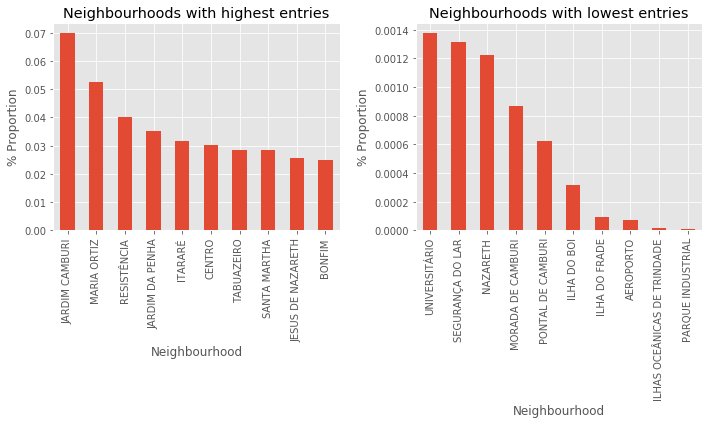

In [23]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
top_10_neighbhourhoods = df['Neighbourhood'].value_counts(normalize = True).head(10)
top_10_neighbhourhoods.plot(kind = 'bar')
plt.title('Neighbourhoods with highest entries')
plt.xlabel('Neighbourhood')
plt.ylabel('% Proportion')

plt.subplot(1,2,2)
bottom_10_neighbhourhoods = df['Neighbourhood'].value_counts(normalize = True).tail(10)
bottom_10_neighbhourhoods.plot(kind = 'bar')
plt.title('Neighbourhoods with lowest entries')
plt.xlabel('Neighbourhood')
plt.ylabel('% Proportion')


plt.tight_layout()
plt.show()

* Highest number of appointments are made from the neighbourhoods of JARDIM CAMBURI followed by MARIA ORTIZ and RESISTÊNCIA. 
* Lowest number of appointments are made from PARQUE INDUSTRIAL neighborhood.
* Having the additional data of population of each neighborhood can help in making better assumptions of the neighborhoods and appointments.

**Other Boolean/Categorical Variables**

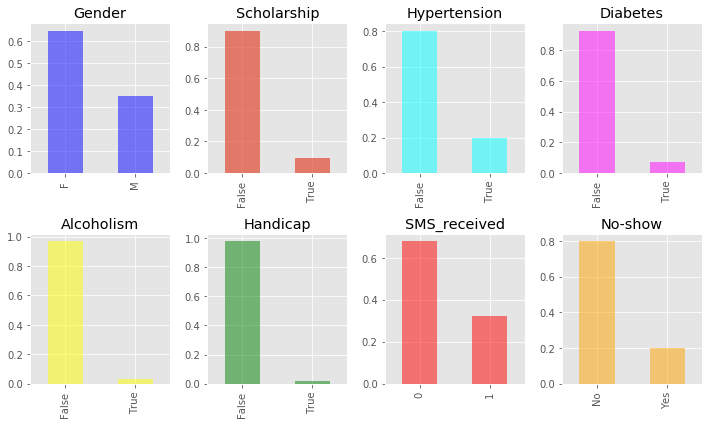

In [24]:
plt.figure(figsize=(10,6))
plt.subplot(2,4,1)
df['Gender'].value_counts(normalize = True).plot(kind = 'bar',alpha=0.5,color='blue')
plt.title('Gender')

plt.subplot(2,4,2)
df['Scholarship'].value_counts(normalize = True).plot(kind = 'bar',alpha=0.7)
plt.title('Scholarship')

plt.subplot(2,4,3)
df['Hypertension'].value_counts(normalize = True).plot(kind = 'bar',alpha=0.5,color='cyan')
plt.title('Hypertension')

plt.subplot(2,4,4)
df['Diabetes'].value_counts(normalize = True).plot(kind = 'bar',alpha=0.5,color='magenta')
plt.title('Diabetes')

plt.subplot(2,4,5)
df['Alcoholism'].value_counts(normalize = True).plot(kind = 'bar',alpha=0.5,color='yellow')
plt.title('Alcoholism')

plt.subplot(2,4,6)
df['Handicap'].value_counts(normalize = True).plot(kind = 'bar',alpha=0.5,color='green')
plt.title('Handicap')


plt.subplot(2,4,7)
df['SMS_received'].value_counts(normalize = True).plot(kind = 'bar',alpha=0.5,color='red')
plt.title('SMS_received')

plt.subplot(2,4,8)
df['No-show'].value_counts(normalize = True).plot(kind = 'bar',alpha=0.5,color='orange')
plt.title('No-show')

plt.tight_layout()
plt.show()

* **Scholarship** : 85% of people who reserved the appointments has no scholarship.
* **Hypertension, Alcoholism & Diabetes** : 20% of the people are suffering from Hypertension. Less than 10% of people are suffering from Diabetes and Alcoholism.
* **SMS_received** : Approximately 70% of the peole did not receive any SMS alerts about the appointments.
* **No-Show**: Only 20% of the appointments made turned out to be a no-show.


**AppointmentDay**

In [25]:
print(max(df['AppointmentDay']) - min(df['AppointmentDay']))
print(min(df['AppointmentDay']))
print(max(df['AppointmentDay']))

40 days 00:00:00
2016-04-29 00:00:00
2016-06-08 00:00:00


It is observed that the AppointmentDay ranges from 2016-04-29 to 2016-06-08, i.e., 40days.

**Extracting Day of the Week for AppointmentDay**

Wednesday    0.234035
Tuesday      0.231982
Monday       0.205508
Friday       0.172077
Thursday     0.156045
Saturday     0.000353
Name: Appointment_WeekDay, dtype: float64


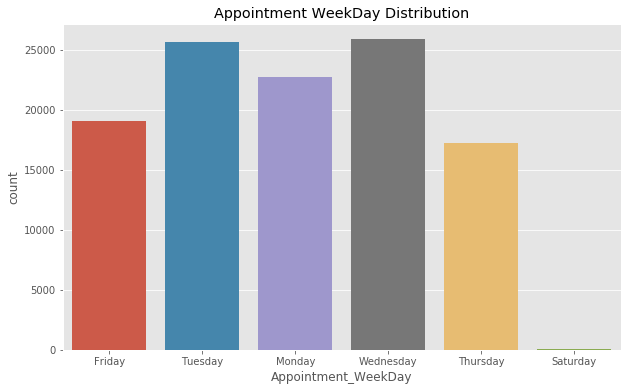

In [26]:
df['Appointment_WeekDay'] = df['AppointmentDay'].dt.weekday_name

print(df['Appointment_WeekDay'].value_counts(normalize = True))

plt.figure(figsize=(10,6))
sns.countplot(df['Appointment_WeekDay'])
plt.title('Appointment WeekDay Distribution')
plt.show()

* The above visual shows that 46% of the appointments are reserved on Tuesday and Wednesday.
* The next favourable days for the appointments as observed above are MOnday, Friday and Thursday.
* The least number of appointments are observed during Saturday, which is obvious as it is a weekend day.

**ScheduledDay**

In [27]:
df['ScheduledDate']= df['ScheduledDay'].dt.date.astype('datetime64[ns]')
print(max(df['ScheduledDate']) - min(df['ScheduledDate']))
print(min(df['ScheduledDate']))
print(max(df['ScheduledDate']))

211 days 00:00:00
2015-11-10 00:00:00
2016-06-08 00:00:00


ScheduleDate varies from 2015-11-10 to 2016-06-08 i.e., around 7 months of time. It is interesting to note that, while appointment range is in the range of 40 days, the schedule date range is 7 months in contrast.

**Extracting Day of the Week for AppointmentDay**

Tuesday      0.236759
Wednesday    0.219514
Monday       0.208856
Friday       0.171136
Thursday     0.163518
Saturday     0.000217
Name: Scheduled_WeekDay, dtype: float64


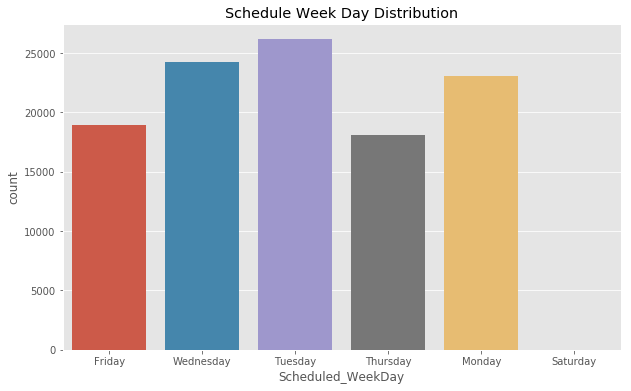

In [28]:
df['Scheduled_WeekDay'] = df['ScheduledDay'].dt.weekday_name

print(df['Scheduled_WeekDay'].value_counts(normalize = True))

plt.figure(figsize=(10,6))
sns.countplot(df['Scheduled_WeekDay'])
plt.title('Schedule Week Day Distribution')
plt.show()

Similar kind of trend is followed in Scheduled day as seen in Appointmet Day. Highest number of appointments are scheduled on Tuedsays followed by Wednesdays and Mondays.

# Bi-variate Analysis

# Age Category Vs No-Show

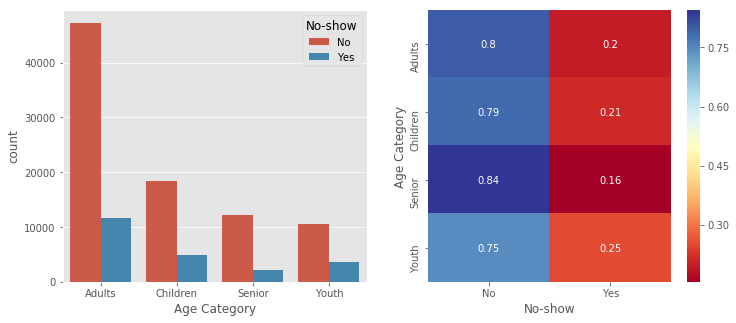

In [29]:
plt.figure(figsize=(12,5))

plt.subplot(121)
sns.countplot(df['Age Category'],hue = df['No-show'])

plt.subplot(122)
sns.heatmap(pd.crosstab(df['Age Category'], df['No-show'],normalize='index'),cmap="RdYlBu", annot=True)
plt.show()

On observing the bar plpot, we may infer that highest number of No-shows are observed in Adults. But the percentage values on the left gives the clear idea of the situation. Out of 100 appointments booked by the Youth, 25 of them turn out be NO-shows which is the highest in the age categories. Seniors are among the age group with less percentage of No-shows. This proves that Age can be an important factor in determing the probability of patient showing/not showing up for his/her appointment.

# (Hypertension, Diabetes, Alcoholism) Vs No-show

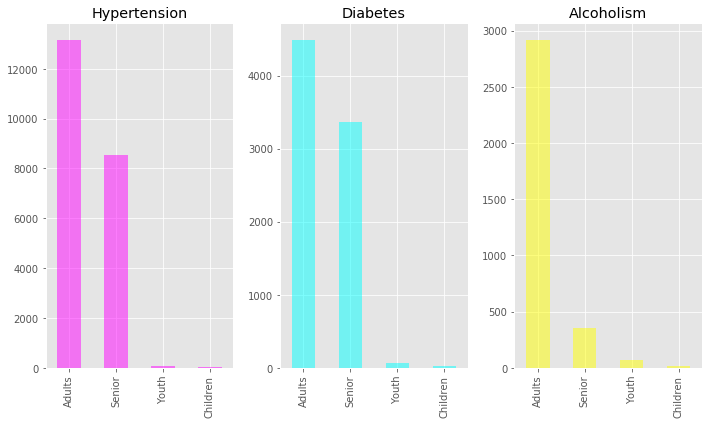

In [30]:
plt.figure(figsize=(10,6))

plt.subplot(131)
df_Hipertension = df[df['Hypertension'] == 1]
df_Hipertension['Age Category'].value_counts().plot(kind = 'bar',alpha=0.5,color='magenta')
plt.title('Hypertension')

plt.subplot(132)
df_Diabetes = df[df['Diabetes'] == 1]
df_Diabetes['Age Category'].value_counts().plot(kind = 'bar',alpha=0.5,color='cyan')
plt.title('Diabetes')

plt.subplot(133)
df_Alcoholism = df[df['Alcoholism'] == 1]
df_Alcoholism['Age Category'].value_counts().plot(kind = 'bar',alpha=0.5,color='yellow')
plt.title('Alcoholism')

plt.tight_layout()
plt.show()

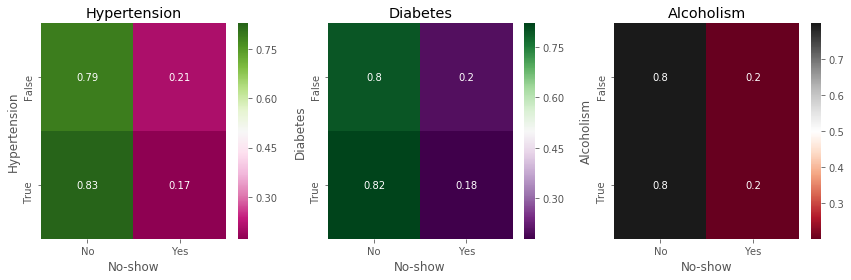

In [31]:
plt.figure(figsize=(12,4))
plt.subplot(131)
sns.heatmap(pd.crosstab(df['Hypertension'], df['No-show'],normalize='index'),cmap="PiYG", annot=True)
plt.title('Hypertension')

plt.subplot(132)
sns.heatmap(pd.crosstab(df['Diabetes'], df['No-show'],normalize='index'),cmap="PRGn", annot=True)
plt.title('Diabetes')

plt.subplot(133)
sns.heatmap(pd.crosstab(df['Alcoholism'], df['No-show'],normalize='index'),cmap="RdGy", annot=True)
plt.title('Alcoholism')

plt.tight_layout()
plt.show()

**Hypertension**

* There are 88,000 patients not suffering from hypertension and 79% of the people are showing up for their appointment.
* Out of 22,500 patients with Hypertension, 83% of them showe up for appointment.

**Diabetes**
* There are 102,000 patients not suffering from hypertension and 80% of the people are showing up for their appointment.
* Out of 8,500 patients with Hypertension, 82% of them showe up for appointment.

**Alcoholism**
* 80% of both the alcoholics and non alcoholics are showing up for their appointments.

The above graphs clearly convey that probability of suffering/not suffering from Hypertension or Diabetes has significant affect on patient's probability of showing up for their appointment. Where as,  Alcoholics or Non alcoholics have the same probability.



# Neighbourhood Vs No-show

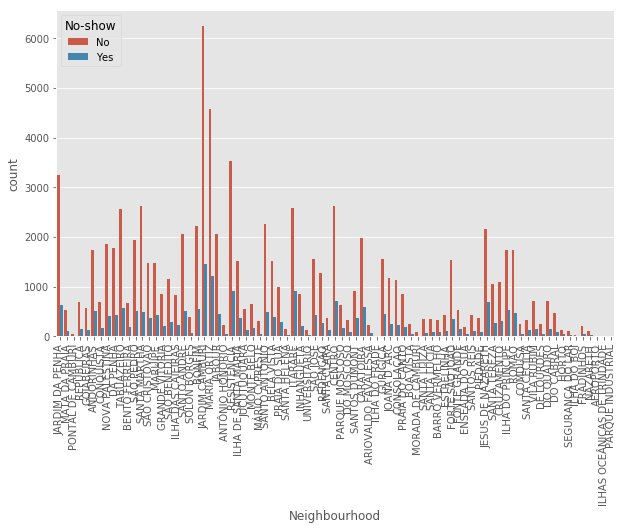

In [32]:
plt.figure(figsize=(10,6))
sns.countplot(df['Neighbourhood'],hue = df['No-show'])
plt.xticks(rotation = 90)
plt.show()

The above visualization does not give an clear idea of Neighbourhood Vs No-Show. Calculating the ratio of number of no-shows to the total number of scheduled appointments may present a clear picture. The lower the ratio, the lower are the no of no shows and vice versa.

                  Neighbourhood  Schedules  No-shows  \
34  ILHAS OCEÂNICAS DE TRINDADE          2         2   
70                SANTOS DUMONT       1276       369   
61                SANTA CECÍLIA        448       123   
62                  SANTA CLARA        506       134   
36                      ITARARÉ       3514       923   

    No-Shows to Schedule Ratio  
34                    1.000000  
70                    0.289185  
61                    0.274554  
62                    0.264822  
36                    0.262664  


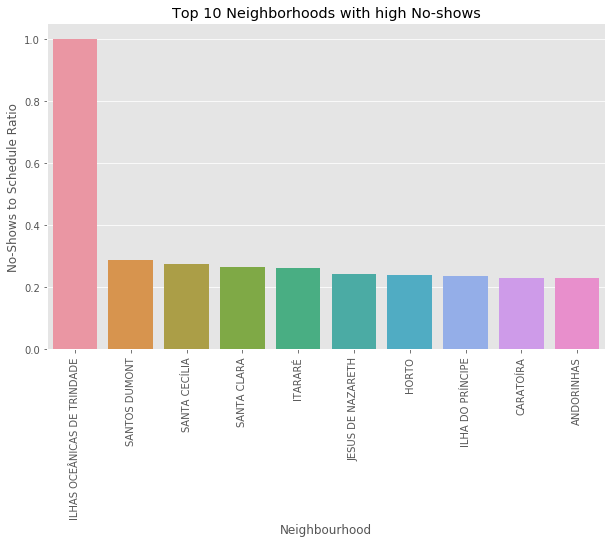

In [33]:
# Scheduled to Show/No-show Ratio

df['No-show'] = df['No-show'].map({'Yes': 1, 'No': 0})
grouped = df.groupby(['Neighbourhood']).agg({'PatientId':'count','No-show':'sum'}).reset_index()
grouped.rename(columns = {'PatientId':'Schedules','No-show':'No-shows'}, inplace = True) 
grouped['No-Shows to Schedule Ratio'] = grouped['No-shows']/grouped['Schedules']

high_no_shows = grouped.sort_values(by = 'No-Shows to Schedule Ratio',ascending = False)[:10]
print(high_no_shows.head())

plt.figure(figsize=(10,6))
sns.barplot(x='Neighbourhood',y='No-Shows to Schedule Ratio',data=high_no_shows)
plt.title('Top 10 Neighborhoods with high No-shows')
plt.xticks(rotation = 90)
plt.show()

        Neighbourhood  Schedules  No-shows  No-Shows to Schedule Ratio
51  PARQUE INDUSTRIAL          1         0                    0.000000
31        ILHA DO BOI         35         3                    0.085714
0           AEROPORTO          8         1                    0.125000
48     MÁRIO CYPRESTE        371        54                    0.145553
73       SOLON BORGES        469        69                    0.147122


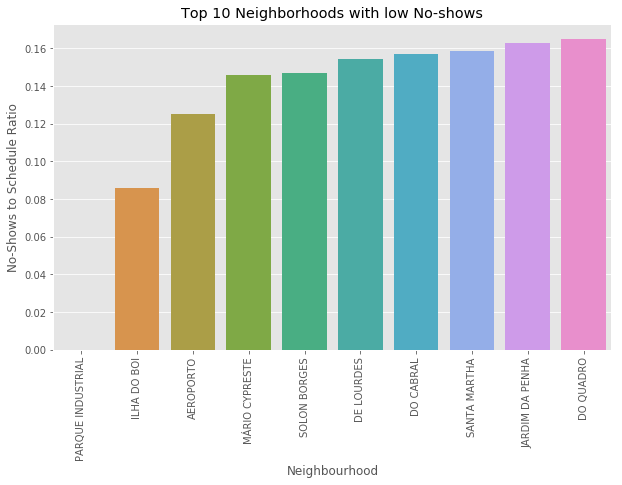

In [34]:
low_no_shows = grouped.sort_values(by = 'No-Shows to Schedule Ratio',ascending = True)[:10]
print(low_no_shows.head())

plt.figure(figsize=(10,6))
sns.barplot(x='Neighbourhood',y='No-Shows to Schedule Ratio',data=low_no_shows)
plt.title('Top 10 Neighborhoods with low No-shows')
plt.xticks(rotation = 90)
plt.show()

# Scholarship Vs No-Show

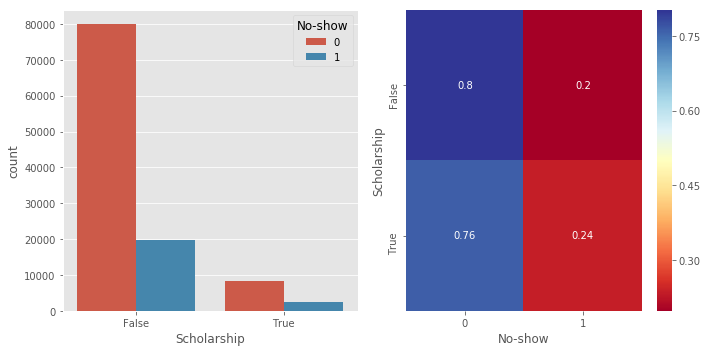

In [35]:
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.countplot(df['Scholarship'],hue=df['No-show'])

plt.subplot(122)
sns.heatmap(pd.crosstab(df['Scholarship'], df['No-show'],normalize='index'),cmap="RdYlBu", annot=True)

plt.tight_layout()
plt.show()

* There are 100,000 patients with no scholarship and 80% of them are showing up for their appointment.
* Out of 10,500 patients with Scholarship, 76% of them showe up for appointment.

# (Appointment Day,Scheduled Day) Vs No-Show

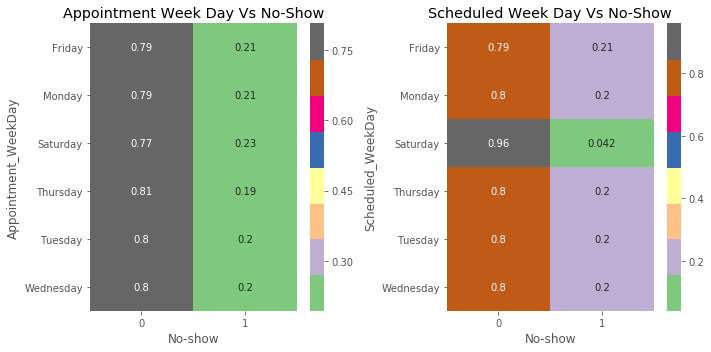

In [36]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.heatmap(pd.crosstab(df['Appointment_WeekDay'], df['No-show'],normalize='index'),cmap="Accent", annot=True)
plt.title('Appointment Week Day Vs No-Show')

plt.subplot(1,2,2)
sns.heatmap(pd.crosstab(df['Scheduled_WeekDay'], df['No-show'],normalize='index'),cmap="Accent", annot=True)
plt.title('Scheduled Week Day Vs No-Show')

plt.tight_layout()
plt.show()

In [37]:
df['SMS_received'].value_counts()

0    75044
1    35482
Name: SMS_received, dtype: int64

It looks like there is no significant relation between the weekday and the probability of the patient showin/not showing up for the appointment. But we can observe that the percentage of no shows is high during Saturdays. The number of days between Scheduled date and Appointment date could reveal more details.

# Calculating number of days between Scheduled date and Appointment date could reveal more details

In [38]:
df['Wait_Days'] = (df['AppointmentDay']-df['ScheduledDay'])
df['Wait_Days'] = df['Wait_Days'].dt.days
df['Wait_Days'].describe()

count    110526.000000
mean          9.183794
std          15.255034
min          -7.000000
25%          -1.000000
50%           3.000000
75%          14.000000
max         178.000000
Name: Wait_Days, dtype: float64

There cannot be -ve number of wait days becauese scheduled date cannot be after appointment date. Checking how many number of such rows exist in the data before dropping them.

In [39]:
df_wait = df[df['Wait_Days']<0]
df_wait.shape

(38567, 19)

There are 38567 number of rows in the data with schedule date later than appointment date. We cannot just drop this huge amount of data. Instead we can reset the schedule date to appointment date.

In [40]:
df['AppointmentDay'] = np.where((df['AppointmentDay'] - df['ScheduledDay']).dt.days < 0, df['ScheduledDay'], df['AppointmentDay'])

In [41]:
df['Wait_Days'] = (df['AppointmentDay']-df['ScheduledDay'])
df['Wait_Days'] = df['Wait_Days'].dt.days
df['Wait_Days'].describe()

count    110526.000000
mean          9.532825
std          15.027769
min           0.000000
25%           0.000000
50%           3.000000
75%          14.000000
max         178.000000
Name: Wait_Days, dtype: float64

We can observe that 25% of the appointments are made on the same day of appointment. An average value of the wait days is around 9 days.

No-show
0     8.171619
1    14.912451
Name: Wait_Days, dtype: float64


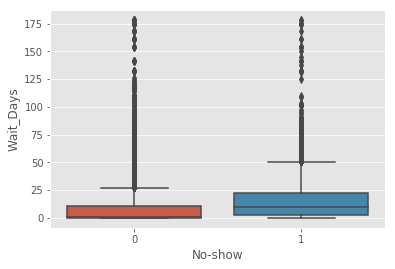

In [42]:
print(df.groupby(['No-show'])['Wait_Days'].mean())

sns.boxplot(x='No-show',y='Wait_Days',data = df)
plt.show()

The average wait among the patients with No-show is 14 days(2 weeks) and 8 days among the patient who show up at appointments.

In [43]:
print(df.groupby(['Age Category'])['Wait_Days'].mean())

Age Category
Adults       9.598060
Children     9.112869
Senior      10.609846
Youth        8.848751
Name: Wait_Days, dtype: float64


The average wait time among different age categories looks similar with no huge differences.

# SMS Received Vs No-Show

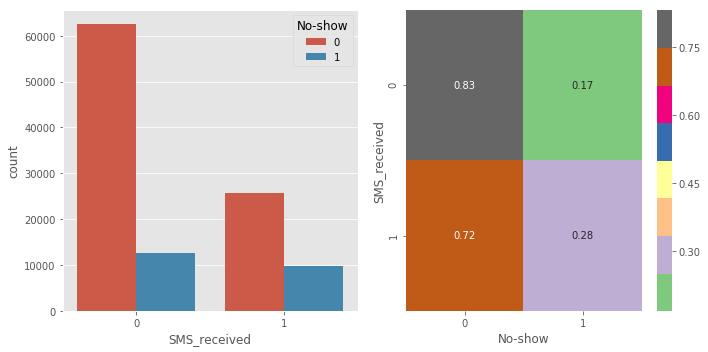

In [44]:
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.countplot(df['SMS_received'],hue=df['No-show'])

plt.subplot(122)
sns.heatmap(pd.crosstab(df['SMS_received'], df['No-show'],normalize='index'),cmap="Accent", annot=True)
#plt.title('Scheduled Day Vs No-Show')

plt.tight_layout()
plt.show()

* There are 35,500 patients who received SMS and 72% of those patients showed up for their appointment.
* Out of around 75,000 patients who did not receive SMS, 83% of them showe up for appointment.

**Conclusion:**

From the above analysis, it is clear that Gender, Age, Neighbourhood, Scholarship,Hypertension and Diabetes are the factors that have an notable affect on the probability of No-show/show.
